In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [28]:
train_file = './data/test.csv'
df = pd.read_csv(train_file)

word_end_indices = list(df[df.NextId == -1].index)
begin = 0
wordset = set([])
words = []
word_images = []
for wend in word_end_indices:
    word = ''.join(df['Prediction'][begin:wend+1])
    if word not in wordset:
        wordset.add(word)
        word_images.append(df.iloc[begin:wend+1,4:].as_matrix())
        words.append(word)
    begin = wend+1
word_images = np.array(word_images)

print(len(word_images))



11


14


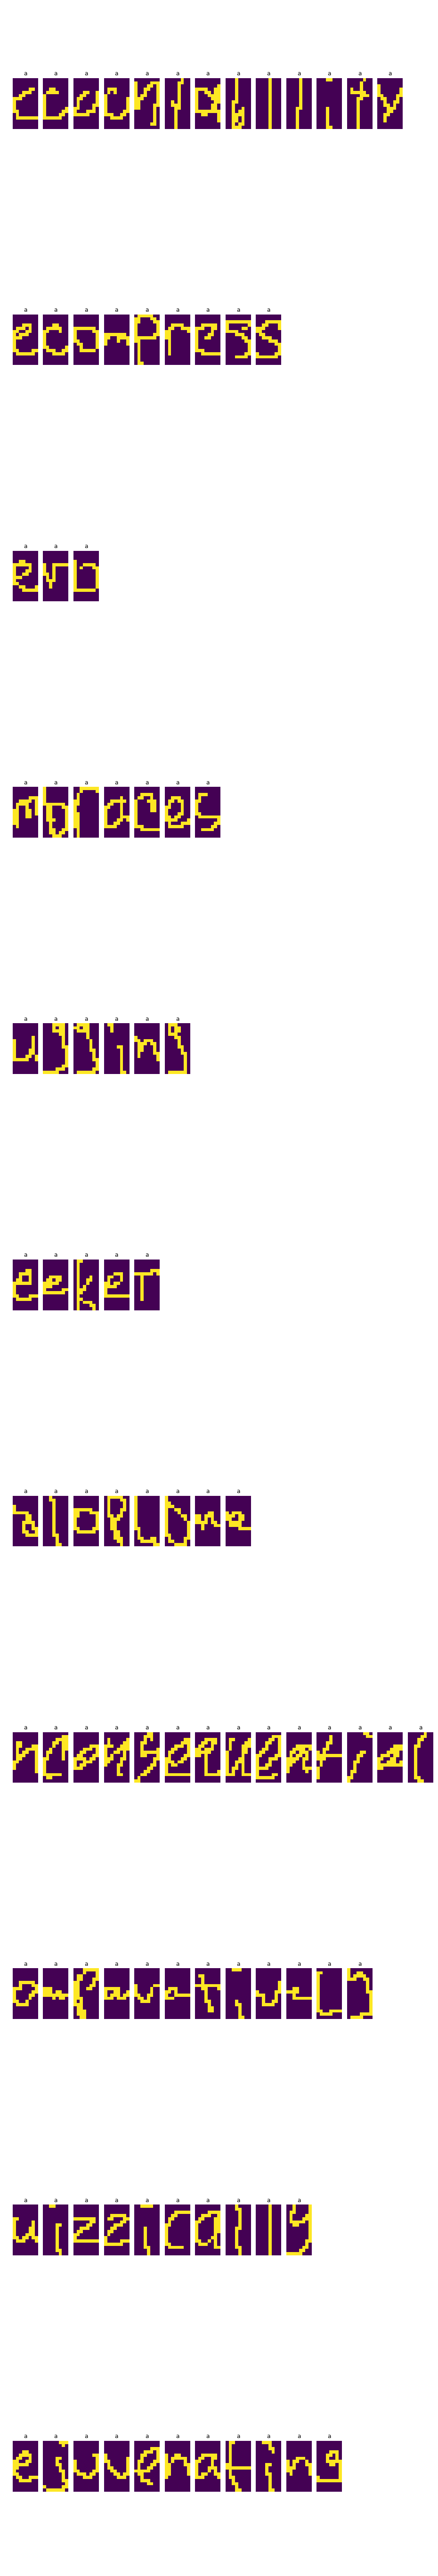

In [29]:
num_words = len(word_images)
max_len = max(map(len, words))
print(max_len)
fig, axes_arr = plt.subplots(num_words, max_len, figsize=(16,100))
for i, w in enumerate(word_images[:num_words]):
    w = w.reshape(-1, 16, 8)
    for j, letter in enumerate(w):
        axes_arr[i,j].imshow(letter)
        axes_arr[i,j].set_title(words[i][j])
        axes_arr[i,j].axis('off')
    for k in range(j,max_len):
        axes_arr[i,k].axis('off')

plt.show()